<a href="https://colab.research.google.com/github/nahbos/AUT-Neural-Networks/blob/main/HW03/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### - Sobhan Moradian Daghigh
#### - 4/24/2022
#### - ANN - HW03

In [1]:
# !pip install pandas==1.3.5

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import itertools
import warnings
warnings.filterwarnings("ignore")

### Q3.

In [17]:
x_train = pd.read_csv('https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW03/Dataset/train/X_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW03/Dataset/train/y_train.txt', header=None, delim_whitespace=True) - 1

x_dataset = pd.read_csv('https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW03/Dataset/test/X_test.txt', header=None, delim_whitespace=True)
y_dataset = pd.read_csv('https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW03/Dataset/test/y_test.txt', header=None, delim_whitespace=True) - 1

x_test, x_val, y_test, y_val = train_test_split(x_dataset, y_dataset, test_size=0.3, random_state=1)

x_train = x_train.to_numpy(dtype='float')
x_test  = x_test.to_numpy(dtype='float')
x_val   = x_val.to_numpy(dtype='float')

(x_train.shape, x_test.shape, x_val.shape)

((7352, 561), (2062, 561), (885, 561))

### Q4.

In [16]:
class EarlyStoppingCallback(keras.callbacks.Callback):
  def __init__(self, patience=0):
    super(EarlyStoppingCallback, self).__init__()
    self.patience = patience

  def on_train_begin(self, logs=None):
    self.best = np.inf
    self.wait = 0
  
  def on_epoch_end(self, epoch, logs=None):
    current_loss = logs.get('loss')
    if np.less(current_loss, self.best):
      self.best = current_loss
      self.wait = 0
      self.best_weights = self.model.get_weights()
    else:
      self.wait += 1
      if np.greater_equal(self.wait, self.patience):
        self.model.stop_training = True
        self.model.set_weights(self.best_weights)

In [56]:
es_callback = EarlyStoppingCallback(patience=5)

In [18]:
n_class = y_train.nunique()[0]

In [19]:
def create_model(layers):
  model = keras.Sequential()

  for i, nodes in enumerate(layers):
    model.add(Dense(units=nodes, activation='relu'))
    model.add(Dropout(0.1))

  model.add(Dense(units=n_class, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [20]:
def create_layers(nodes, max_layers):
  layers = []
  for i in range(1, 1 << len(nodes)):
    subset = [nodes[j] for j in range(len(nodes)) if (i & (1 << j))]
    if len(subset) < max_layers:
      layers.append(subset)
  layers = [np.flip(np.sort(ele)).tolist() for ele in layers]
  layers.sort()
  layers = list(item for item, _ in itertools.groupby(layers))
  
  return layers 

In [21]:
model = KerasClassifier(build_fn=create_model)

In [32]:
max_layers = 4
nodes = [32, 64, 128, 256, 512, 1024]

layers = create_layers(nodes, max_layers)
parameters = dict(layers=layers)
grid = GridSearchCV(estimator=model, param_grid=parameters)

In [ ]:
grid.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_.score(x_test, y_test, verbose=1)

In [ ]:
# ---------------------------------------------------------------------------------------------

In [60]:
# model1

model1 = keras.Sequential()
model1.add(Dense(units=12, activation='relu'))
model1.add(Dense(units=6, activation='softmax'))

model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 2s 5ms/step - loss: 0.8559 - accuracy: 0.7040 - val_loss: 0.3871 - val_accuracy: 0.8881
Epoch 2/20
230/230 [==============================] - 1s 5ms/step - loss: 0.2902 - accuracy: 0.9044 - val_loss: 0.2747 - val_accuracy: 0.9119
Epoch 3/20
230/230 [==============================] - 1s 4ms/step - loss: 0.2144 - accuracy: 0.9248 - val_loss: 0.2223 - val_accuracy: 0.9322
Epoch 4/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1726 - accuracy: 0.9385 - val_loss: 0.2007 - val_accuracy: 0.9288
Epoch 5/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1451 - accuracy: 0.9495 - val_loss: 0.1831 - val_accuracy: 0.9367
Epoch 6/20
230/230 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.9589 - val_loss: 0.1644 - val_accuracy: 0.9480
Epoch 7/20
230/230 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9603 - val_loss: 0.1555 - val_accuracy: 0.9492
Epoch 

In [62]:
# model2

model2 = keras.Sequential()
model2.add(Dense(units=24, activation='relu'))
model2.add(Dense(units=12, activation='relu'))
model2.add(Dense(units=6, activation='softmax'))

model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 2s 5ms/step - loss: 0.7888 - accuracy: 0.7141 - val_loss: 0.4269 - val_accuracy: 0.8701
Epoch 2/20
230/230 [==============================] - 1s 4ms/step - loss: 0.2818 - accuracy: 0.9064 - val_loss: 0.2583 - val_accuracy: 0.9232
Epoch 3/20
230/230 [==============================] - 1s 4ms/step - loss: 0.1735 - accuracy: 0.9385 - val_loss: 0.2098 - val_accuracy: 0.9311
Epoch 4/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1300 - accuracy: 0.9554 - val_loss: 0.1745 - val_accuracy: 0.9435
Epoch 5/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9585 - val_loss: 0.1710 - val_accuracy: 0.9345
Epoch 6/20
230/230 [==============================] - 1s 4ms/step - loss: 0.0925 - accuracy: 0.9668 - val_loss: 0.1796 - val_accuracy: 0.9288
Epoch 7/20
230/230 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9697 - val_loss: 0.1562 - val_accuracy: 0.9401
Epoch 

In [64]:
# model3

model3 = keras.Sequential()
model3.add(Dense(units=48, activation='relu'))
model3.add(Dense(units=24, activation='relu'))
model3.add(Dense(units=12, activation='relu'))
model3.add(Dense(units=6, activation='softmax'))

model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 0.7441 - accuracy: 0.7051 - val_loss: 0.3327 - val_accuracy: 0.8881
Epoch 2/20
230/230 [==============================] - 1s 3ms/step - loss: 0.2047 - accuracy: 0.9229 - val_loss: 0.2144 - val_accuracy: 0.9243
Epoch 3/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1342 - accuracy: 0.9504 - val_loss: 0.3103 - val_accuracy: 0.8960
Epoch 4/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1109 - accuracy: 0.9572 - val_loss: 0.1901 - val_accuracy: 0.9379
Epoch 5/20
230/230 [==============================] - 1s 2ms/step - loss: 0.0923 - accuracy: 0.9650 - val_loss: 0.1523 - val_accuracy: 0.9435
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9706 - val_loss: 0.1756 - val_accuracy: 0.9288
Epoch 7/20
230/230 [==============================] - 1s 5ms/step - loss: 0.0719 - accuracy: 0.9713 - val_loss: 0.2892 - val_accuracy: 0.9096
Epoch 

In [66]:
# model4

model4 = keras.Sequential()
model4.add(Dense(units=48, activation='relu'))
model4.add(Dense(units=6, activation='softmax'))

model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 0.5060 - accuracy: 0.8361 - val_loss: 0.3212 - val_accuracy: 0.8870
Epoch 2/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1984 - accuracy: 0.9320 - val_loss: 0.2079 - val_accuracy: 0.9333
Epoch 3/20
230/230 [==============================] - 1s 4ms/step - loss: 0.1404 - accuracy: 0.9510 - val_loss: 0.1653 - val_accuracy: 0.9435
Epoch 4/20
230/230 [==============================] - 1s 4ms/step - loss: 0.1132 - accuracy: 0.9629 - val_loss: 0.1557 - val_accuracy: 0.9458
Epoch 5/20
230/230 [==============================] - 1s 4ms/step - loss: 0.0898 - accuracy: 0.9705 - val_loss: 0.1385 - val_accuracy: 0.9492
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9694 - val_loss: 0.1332 - val_accuracy: 0.9559
Epoch 7/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.9733 - val_loss: 0.1560 - val_accuracy: 0.9469
Epoch 

In [68]:
# model5

model5 = keras.Sequential()
model5.add(Dense(units=512, activation='relu'))
model5.add(Dense(units=12, activation='relu'))
model5.add(Dense(units=6, activation='softmax'))

model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model5.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 2s 6ms/step - loss: 1.0113 - accuracy: 0.5960 - val_loss: 0.6777 - val_accuracy: 0.7966
Epoch 2/20
230/230 [==============================] - 2s 8ms/step - loss: 0.5781 - accuracy: 0.8337 - val_loss: 0.5310 - val_accuracy: 0.8983
Epoch 3/20
230/230 [==============================] - 2s 7ms/step - loss: 0.4541 - accuracy: 0.8970 - val_loss: 0.4753 - val_accuracy: 0.9130
Epoch 4/20
230/230 [==============================] - 1s 5ms/step - loss: 0.3844 - accuracy: 0.9280 - val_loss: 0.3907 - val_accuracy: 0.9277
Epoch 5/20
230/230 [==============================] - 1s 5ms/step - loss: 0.2853 - accuracy: 0.9487 - val_loss: 0.3672 - val_accuracy: 0.9153
Epoch 6/20
230/230 [==============================] - 1s 5ms/step - loss: 0.2219 - accuracy: 0.9608 - val_loss: 0.2871 - val_accuracy: 0.9458
Epoch 7/20
230/230 [==============================] - 1s 5ms/step - loss: 0.1784 - accuracy: 0.9694 - val_loss: 0.2646 - val_accuracy: 0.9492
Epoch 

In [75]:
# model6

model6 = keras.Sequential()
model6.add(Dense(units=12, activation='relu'))
model6.add(Dense(units=6, activation='softmax'))

model6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model6.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 2s 6ms/step - loss: 2.0279 - accuracy: 0.1933 - val_loss: 1.7874 - val_accuracy: 0.2011
Epoch 2/20
230/230 [==============================] - 1s 2ms/step - loss: 1.3391 - accuracy: 0.3647 - val_loss: 1.4119 - val_accuracy: 0.3254
Epoch 3/20
230/230 [==============================] - 1s 2ms/step - loss: 1.0689 - accuracy: 0.4490 - val_loss: 1.5759 - val_accuracy: 0.3401
Epoch 4/20
230/230 [==============================] - 1s 2ms/step - loss: 1.1017 - accuracy: 0.4408 - val_loss: 1.0483 - val_accuracy: 0.4373
Epoch 5/20
230/230 [==============================] - 1s 2ms/step - loss: 1.0829 - accuracy: 0.4623 - val_loss: 2.0423 - val_accuracy: 0.3153
Epoch 6/20
230/230 [==============================] - 1s 5ms/step - loss: 1.1688 - accuracy: 0.4263 - val_loss: 0.9066 - val_accuracy: 0.5096
Epoch 7/20
230/230 [==============================] - 1s 4ms/step - loss: 0.9037 - accuracy: 0.5136 - val_loss: 1.3303 - val_accuracy: 0.4045
Epoch 

In [76]:
# model7

model7 = keras.Sequential()
model7.add(Dense(units=12, activation='relu'))
model7.add(Dense(units=6, activation='softmax'))

model7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model7.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 1.1713 - accuracy: 0.5195 - val_loss: 0.6885 - val_accuracy: 0.7356
Epoch 2/20
230/230 [==============================] - 1s 2ms/step - loss: 0.4921 - accuracy: 0.8154 - val_loss: 0.4158 - val_accuracy: 0.8701
Epoch 3/20
230/230 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8713 - val_loss: 0.3373 - val_accuracy: 0.8938
Epoch 4/20
230/230 [==============================] - 1s 2ms/step - loss: 0.2778 - accuracy: 0.9008 - val_loss: 0.3236 - val_accuracy: 0.8780
Epoch 5/20
230/230 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9183 - val_loss: 0.2649 - val_accuracy: 0.9051
Epoch 6/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1997 - accuracy: 0.9297 - val_loss: 0.2565 - val_accuracy: 0.9141
Epoch 7/20
230/230 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.9426 - val_loss: 0.2565 - val_accuracy: 0.9107
Epoch 

In [79]:
# model8

model8 = keras.Sequential()
model8.add(Dense(units=12, activation='relu'))
model8.add(Dense(units=6, activation='softmax'))

model8.compile(optimizer=keras.optimizers.Adam(learning_rate=0.008), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model8.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 0.3831 - accuracy: 0.8433 - val_loss: 0.2679 - val_accuracy: 0.8825
Epoch 2/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1588 - accuracy: 0.9380 - val_loss: 0.3722 - val_accuracy: 0.8452
Epoch 3/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1136 - accuracy: 0.9551 - val_loss: 0.1723 - val_accuracy: 0.9243
Epoch 4/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9547 - val_loss: 0.1516 - val_accuracy: 0.9435
Epoch 5/20
230/230 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9648 - val_loss: 0.1784 - val_accuracy: 0.9299
Epoch 6/20
230/230 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9695 - val_loss: 0.1772 - val_accuracy: 0.9311
Epoch 7/20
230/230 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9729 - val_loss: 0.1678 - val_accuracy: 0.9458
Epoch 

In [81]:
models = [model1, model2, model3, model4, model5, model6, model7, model8]

In [82]:
for model in models:
  print(model.evaluate(x_test, y_test, verbose=1))

65/65 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9564
[0.11879885196685791, 0.9563530683517456]
65/65 [==============================] - 0s 2ms/step - loss: 0.1867 - accuracy: 0.9418
[0.1867406666278839, 0.941804051399231]
65/65 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9457
[0.1869545876979828, 0.9456837773323059]
65/65 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.9374
[0.16756665706634521, 0.9374393820762634]
65/65 [==============================] - 0s 3ms/step - loss: 0.1839 - accuracy: 0.9355
[0.18389587104320526, 0.9354994893074036]
65/65 [==============================] - 0s 1ms/step - loss: 1.2924 - accuracy: 0.4079
[1.292379379272461, 0.40785646438598633]
65/65 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9132
[0.22270922362804413, 0.9131910800933838]
65/65 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9413
[0.20634272694

### Q5.

In [11]:
class SOM:

    def __init__(self, map_size, lr=0.1):

        # Args: map_size : [map_w, map_h, f=561]

        self.map = np.random.random(size=(map_size[0], map_size[1], map_size[2]))

        self.lr0 = lr
        self.lr = self.lr0

        self.R0 = map_size[0] // 2
        self.R = self.R0


    def train(self, X, y, T=1000, error_threshold=10**-20):

        # Loss history
        Js = []
        for t in range(T):
            prev_map = self.map.copy()

            # Shuffle X in every iteration
            shuffle_ind = np.random.randint(0, X.shape[0], X.shape[0])
            
            for i in range(X.shape[0]):

                x = X[shuffle_ind[i], :]

                # Neuron with most compatibilty with x
                winner = self.find_winner(x)

                # Get all neurons in the neighborhood of winner
                NS = self.get_NS(winner)

                # Update weights of all neurons in the neighborhood of winner
                self.update_weights(x, winner, NS, len(X)) 

            # Update learning rate and neighborhood radius (linear decay)
            self.lr = self.lr0 * (1 - t / T)
            self.R  = self.R0  * (1 - t / T)


            Js.append(np.linalg.norm(prev_map - self.map))

            if t % 100 == 0 or t == T - 1:
                print(f"Iteration: {t}, Loss: {Js[-1]:.4f}, lr: {self.lr:.4f}, R: {self.R:.4f}")
            
            if Js[-1] < error_threshold:
                print("MIN CHANGE")
                break

        return Js
    

    def find_winner(self, x):
        rep_x = np.tile(x, (self.map.shape[0], self.map.shape[1], 1))
        dists = np.sum((self.map - rep_x) ** 2, axis=2)
        winner = np.unravel_index(np.argmin(dists, axis=None), shape=dists.shape)
        return winner


    def get_NS(self, winner):

        # NS: Neighborhood strength
        NS = np.zeros((self.map.shape[0], self.map.shape[1]))

        # winner i,j
        iw, jw = winner[0], winner[1]
        
        # Winner
        NS[iw, jw] = 1 

        # Circular neighborhood
        R = int(self.R)
        for ri in range(-R, R):
            for rj in range(-R, R):
                if 0 <= iw + ri < self.map.shape[0] and 0 <= jw + rj < self.map.shape[1]:
                    NS[iw + ri, jw + rj] = 0 if np.sqrt(ri**2 + rj**2) > R else 1/(1+np.sqrt(ri**2 + rj**2))
        
        return NS

    def update_weights(self, x, winner, n_strength, X_len):

        # Note: n_strength is already W*H we just need to make it W*H*f
        NS = np.tile(n_strength, (self.map.shape[2], 1, 1)).transpose()

        # Difference between inputs and neurons
        rep_x = np.tile(x, (self.map.shape[0], self.map.shape[1], 1))
        Delta = rep_x - self.map

        # Update weights
        self.map = self.map + (self.lr / X_len) * np.multiply(NS, Delta)


    def cal_euc(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2))


    def cal_u_matrix(self): 
     u_matrix = np.zeros((self.map.shape[0], self.map.shape[1]))

     for i in range(0, self.map.shape[0]):
        for j in range(0, self.map.shape[1]):
            sum_dist=0
            ct=0
            if i-1>=0:
                sum_dist += self.cal_euc(self.net[i,j],self.net[i-1,j])
                ct+=1
            if i+1<=self.net.shape[0]-1:
                sum_dist+=self._cal_euc(self.net[i,j],self.net[i+1,j])
                ct+=1
            if j-1>=0:
                sum_dist+=self._cal_euc(self.net[i,j],self.net[i,j-1])
                ct+=1
            if j+1<=self.net.shape[1]-1:
                sum_dist+=self._cal_euc(self.net[i,j],self.net[i,j+1]) 
                ct+=1
            self.u_matrix[i,j]=sum_dist/ct


        plt.imshow(self.scores/np.max(self.scores))
        plt.title("Map Vizualization")
        plt.show()

     return self.u_matrix

            
    def extract_features(self, x):
        rep_x = np.tile(x, (self.map.shape[0], self.map.shape[1], 1))
        dists = np.sum((self.map - rep_x) ** 2, axis=2)
        return 1/(1+dists)

Iteration: 0, Loss: 3.6101, lr: 0.1000, R: 4.0000
Iteration: 100, Loss: 0.3011, lr: 0.0667, R: 2.6667
Iteration: 200, Loss: 0.0502, lr: 0.0333, R: 1.3333
Iteration: 299, Loss: 0.0006, lr: 0.0003, R: 0.0133


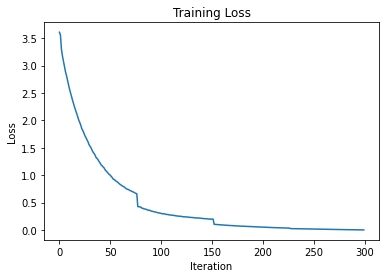

In [18]:
som_net = SOM(map_size=(9, 9, x_train.shape[1]))

# Loss
Js = som_net.train(x_train, y_train, T=300)
plt.plot(Js)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# # Visualize
# scores = som_net.visualize(X, y)

# # Feature Extraction
# x = X[0, :]
# features = som_net.extract_features(x)
# plt.imshow(features)
# plt.title("Feature Extraction")
# plt.show()


In [14]:
x_train.iloc[7000, :]

0     -0.088994
1      0.270256
2      0.167615
3     -0.840510
4     -0.470905
         ...   
556   -0.021962
557    0.026312
558   -0.661154
559    0.057936
560   -0.223915
Name: 7000, Length: 561, dtype: float64